# Mon Reader - Project

# Background and Problem Statement

Our company develops innovative Artificial Intelligence and Computer Vision solutions that revolutionize industries. Machines that can see: We pack our solutions in small yet intelligent devices that can be easily integrated to your existing data flow. Computer vision for everyone: Our devices can recognize faces, estimate age and gender, classify clothing types and colors, identify everyday objects and detect motion. Technical consultancy: We help you identify use cases of artificial intelligence and computer vision in your industry. Artificial intelligence is the technology of today, not the future.

MonReader is a new mobile document digitalization experience for the blind, for researchers and for everyone else in need for fully automatic, highly fast and high-quality document scanning in bulk. It is composed of a mobile app and all the user needs to do is flip pages and everything is handled by MonReader: it detects page flips from low-resolution camera preview and takes a high-resolution picture of the document, recognizing its corners and crops it accordingly, and it dewarps the cropped document to obtain a bird's eye view, sharpens the contrast between the text and the background and finally recognizes the text with formatting kept intact, being further corrected by MonReader's ML powered redactor.

We collected page flipping video from smart phones and labelled them as flipping and not flipping.

We clipped the videos as short videos and labelled them as flipping or not flipping. The extracted frames are then saved to disk in a sequential order with the following naming structure: VideoID_FrameNumber

# Project Objectives

The goal of the project is to predict if the page is being flipped using a single image.

The success metrics that will be:

Evaluate model performance based on F1 score, the higher the better.


# Libraries Imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import tensorflow 
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
from PIL import Image
from skimage import io 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, f1_score
from collections import Counter

# Define Transformations
We need to specify the alterations we want to perform on these pictures — since the same command that imports them also transforms the data.
The images will be resized and center croped to ensure that all images are of the same size. This is necessary as AI models are unable to handle images of different sizes.
The images are converted to numbers using ToTensor and normalised.

In [2]:
# Specify transforms using torchvision.transforms as transforms
# library
transformations = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# The Data

We collected page flipping video from smart phones and labelled them as flipping and not flipping.

We clipped the videos as short videos and labelled them as flipping or not flipping. The extracted frames are then saved to disk in a sequential order with the following naming structure: VideoID_FrameNumber.

https://drive.google.com/file/d/1KDQBTbo5deKGCdVV_xIujscn5ImxW4dm/view?usp=sharing

In [3]:
# Download training data.
train_set = datasets.ImageFolder(r'C:\Users\verph\OneDrive\Documents\AP - Projects\Mon Reader\training', 
                                 transform = transformations)

# Download test data.
test_set = datasets.ImageFolder(r'C:\Users\verph\OneDrive\Documents\AP - Projects\Mon Reader\testing', 
                                transform = transformations)


In [4]:
# Get the 'calss to index'mapping
class_name_mapping = train_set.class_to_idx
class_name_mapping

{'flip': 0, 'notflip': 1}

In [5]:
#Get the list of y
train_set.targets


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [7]:
#Use counter to count targets
class_counter = Counter(train_set.targets)
class_counter

Counter({0: 1162, 1: 1230})

In [8]:
#Print results
for class_name in class_name_mapping:
    print(class_name, ":", class_counter[class_name_mapping[class_name]])

flip : 1162
notflip : 1230


The data is provided split into training and test sets. 
The training set consists of 2392 images with 1162 being flip and 1230 being notflip. This is an indication that we are not dealing with an imbalanced dataset.
The test set consists of 597 images, with 290 flip and 307 notflip, a total dataset of 2989.

# Loading the Data

We then put our imported images into a Dataloader.
Dataloader is able to spit out random samples of our data, so our model won’t have to deal with the entire dataset every time. This makes training more efficient. 
We specify how many images we want at once as our batch_size (so 32 means we want to get 32 images at one time). We also want to shuffle our images so it gets inputted randomly into our AI model

In [9]:
# Passing the data through the dataloader using torch library
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size =32, shuffle=True)

# Get Pre-Trained Model

In [10]:
# Get pretrained model using torchvision.models as models library
model = models.densenet161(pretrained=True)
# Turn off training for their parameters
for param in model.parameters():
    param.requires_grad = False

# Creating Classifier

In [11]:
# Create new classifier for model using torch.nn as nn library
classifier_input = model.classifier.in_features
num_labels = 2
classifier = nn.Sequential(nn.Linear(classifier_input, 1024),
                           nn.ReLU(),
                           nn.Linear(1024, 512),
                           nn.ReLU(),
                           nn.Linear(512, num_labels),
                           nn.LogSoftmax(dim=1))
# Replace default classifier with new classifier
model.classifier = classifier

# Training and Evaluating our model

Training a model on a GPU is a lot faster than a CPU. So to determine which device is available, we use Torch to check. We then move our model to this device.

In [12]:
# Find the device available to use using torch library
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Move model to the device specified above
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

# Evaluating the error in our Model

While training, we need to determine how “off” our model is. To evaluate the amount of error our model has, we use nn.NLLLoss. This function takes in the output of our model, for which we used the nn.LogSoftmax function.
To train our model, we take our error and see how we can adjust the weights we multiplied our numbers by to get the smallest error. The method of calculating how we adjust our weights and applying it to our weights is called Adam. We use the torch.optim library to use this method and give it our parameters.

# Optimizers

There are several optimizers / alogritms available for use with the pytorch, and these are but a few:
* Adam
* ASGD 
* SGD

Optimizers are algorithms or methods used to minimize an error function(loss function)or to maximize the efficiency of production. Optimizers are mathematical functions which are dependent on model's learnable parameters i.e Weights & Biases.

We will use the Adam Optimizer / algorithm in the problem below.

In [13]:
# Set the error function using torch.nn as nn library
criterion = nn.NLLLoss()
# Set the optimizer function using torch.optim as optim library
optimizer = optim.Adam(model.classifier.parameters())

# Training the Model

We want our model to go through the entire dataset multiple times, so we use a for loop. Every time it has gone over the entire set of images, it is called an epoch. In one epoch we want the model to go through both the training set and the validation set.
We first set the model to training mode and we use a for-loop to go through every image.
After moving the images and the labels to the appropriate device, we need to clear the adjustments of the weights by declaring optimizer.zero_grad().
We can then compute the output of our model given our images and how “off” our model is given its output and the correct answers.
Then we can find the adjustments we need to make to decreases this error by calling loss.backward() and use our optimizer to adjust the weights by calling optimizer.step().

In [14]:
epochs = 5
for epoch in range(epochs):
    train_loss = 0
    test_loss = 0
    accuracy = 0
    
    # Training the model
    model.train()
    counter = 0
    for inputs, labels in train_loader:
        # Move to device
        inputs, labels = inputs.to(device), labels.to(device)
        # Clear optimizers
        optimizer.zero_grad()
        # Forward pass
        output = model.forward(inputs)
        # Loss
        loss = criterion(output, labels)
        # Calculate gradients (backpropogation)
        loss.backward()
        # Adjust parameters based on gradients
        optimizer.step()
        # Add the loss to the training set's rnning loss
        train_loss += loss.item()*inputs.size(0)
        
         
    
    # Evaluating the model
    model.eval()
   
    # Define the list to store all predictions and labels
    all_predictions = []
    all_labels = []
   
    with torch.no_grad():
        for inputs, labels in test_loader:
            # Calculate output
            inputs, labels = inputs.to(device), labels.to(device)
            output = model.forward(inputs)
            output = torch.exp(output)
            top_p, top_class = output.topk(1, dim=1)
           
            # Add predictions and labels of this batch to the list
            # .flatten().tolist() is to convert the tensor to python list
            all_predictions.extend(top_class.flatten().tolist())
            all_labels.extend(labels.flatten().tolist())
   
    # You can use any metrics from scikit learn. Here, I have imported them above:
    # from sklearn.metrics import classification_report, f1_score
    print(f1_score(all_labels, all_predictions))
    print(classification_report(all_labels, all_predictions)) 
              
    # Get the average loss for the entire epoch
    train_loss = train_loss/len(train_loader.dataset)
    test_loss = test_loss/len(test_loader.dataset)
    # Print out the information
    print('Accuracy: ', accuracy/len(test_loader))
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, test_loss))

0.9290540540540542
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       290
           1       0.96      0.90      0.93       307

    accuracy                           0.93       597
   macro avg       0.93      0.93      0.93       597
weighted avg       0.93      0.93      0.93       597

Accuracy:  0.0
Epoch: 0 	Training Loss: 0.484051 	Validation Loss: 0.000000
0.9673202614379086
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       290
           1       0.97      0.96      0.97       307

    accuracy                           0.97       597
   macro avg       0.97      0.97      0.97       597
weighted avg       0.97      0.97      0.97       597

Accuracy:  0.0
Epoch: 1 	Training Loss: 0.218091 	Validation Loss: 0.000000
0.9638932496075354
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       290
           1       0.93     

# Using our model

We want to give it a random image and see which label it thinks it is.
First, we set the model for evaluation mode

In [15]:
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [16]:
 #Process our image
def process_image(image_path):
    # Load Image
    img = Image.open(image_path)
    
    # Get the dimensions of the image
    width, height = img.size
    
    # Resize by keeping the aspect ratio, but changing the dimension
    # so the shortest size is 255px
    img = img.resize((255, int(255*(height/width))) if width < height else (int(255*(width/height)), 255))
    
    # Get the dimensions of the new image size
    width, height = img.size
    
    # Set the coordinates to do a center crop of 224 x 224
    left = (width - 224)/2
    top = (height - 224)/2
    right = (width + 224)/2
    bottom = (height + 224)/2
    img = img.crop((left, top, right, bottom))
    
    # Turn image into numpy array
    img = np.array(img)
    
    # Make the color channel dimension first instead of last
    img = img.transpose((2, 0, 1))
    
    # Make all values between 0 and 1
    img = img/255
    
    # Normalize based on the preset mean and standard deviation
    img[0] = (img[0] - 0.485)/0.229
    img[1] = (img[1] - 0.456)/0.224
    img[2] = (img[2] - 0.406)/0.225
    
    # Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis,:]
    
    # Turn into a torch tensor
    image = torch.from_numpy(img)
    image = image.float()
    return image

After processing the image, we can build a function to use our model to predict the label. We input the image into our model and obtain the output. We then reverse the log in the LogSoftmax function that we applied in the output layer and return the top class the model predicted and how certain it is of its guess.

# Using our model to predict the label

In [17]:
# Using our model to predict the label
def predict(image, model):
    # Pass the image through our model
    output = model.forward(image)
    
    # Reverse the log function in our output
    output = torch.exp(output)
    
    # Get the top predicted class, and the output percentage for
    # that class
    probs, classes = output.topk(1, dim=1)
    return probs.item(), classes.item()

# Displaying the Image

Lastly, we want to display the image. We turn the image back into an array, and un-normalize it by multiplying by the standard deviation and adding back the mean. We then use the matplotlib.pyplot library to plot the picture.

In [18]:
# Show Image
def show_image(image):
    # Convert image to numpy
    image = image.numpy()
    
    # Un-normalize the image
    image[0] = image[0] * 0.226 + 0.445
    
    # Print the image
    fig = plt.figure(figsize=(25, 4))
    plt.imshow(np.transpose(image[0], (1, 2, 0)))

# Determine Accuracy of the Model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model is  99.84102249145508 % certain that the image has a predicted class of  0


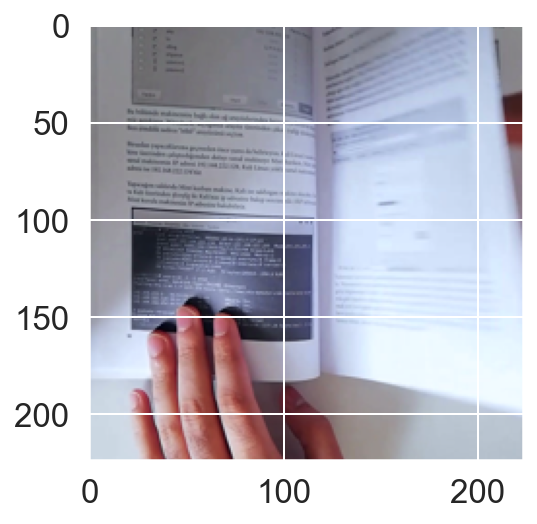

In [19]:
# Process Image
image = process_image(r'C:\Users\verph\OneDrive\Documents\AP - Projects\Mon Reader\testing\flip\0002_000000012.jpg')
# Give image to model to predict output
top_prob, top_class = predict(image, model)
# Show the image
show_image(image)
# Print the results
print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", top_class  )

# Saving the Model

In [20]:
# Save the Model
torch.save(model, r"C:\Users\verph\OneDrive\Documents\AP - Projects\Mon Reader\Output\image_model.pt")

# Loading the Model

In [21]:
# Model class must be defined somewhere
model = torch.load(r"C:\Users\verph\OneDrive\Documents\AP - Projects\Mon Reader\Output\image_model.pt")
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

This save/load process uses the most intuitive syntax and involves the least amount of code. Saving a model in this way will save the entire module using Python’s pickle module. The disadvantage of this approach is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved. The reason for this is because pickle does not save the model class itself. Rather, it saves a path to the file containing the class, which is used during load time. Because of this, your code can break in various ways when used in other projects or after refactors.

A common PyTorch convention is to save models using either a .pt or .pth file extension.

We must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

# Tuning the Model

Tuning is the process of maximizing a model's performance without overfitting or creating too high of a variance. Hyperparameters differ from other model parameters in that they are not learned by the model automatically through training methods.

# Summary

Using the F1 Score as the metrics we can see that the best performing model is epoch 1 with both Accuracy and F1 Scores of 97%.

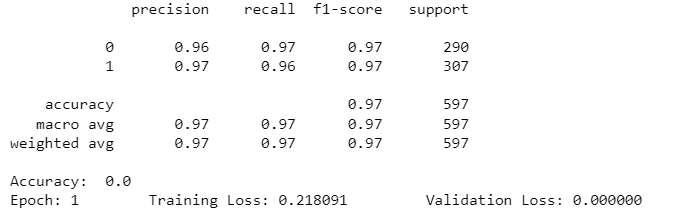
